In [25]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from pprint import pprint

load_dotenv() 

True

In [5]:
AV_API_KEY = os.getenv("AV_API_KEY")
FRED_API_KEY = os.getenv("FRED_API_KEY")

In [3]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey={AV_API_KEY}'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2024-04-26', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-04-26': {'1. open': '169.8800', '2. high': '171.3400', '3. low': '169.1800', '4. close': '169.3000', '5. volume': '44838354'}, '2024-04-25': {'1. open': '169.5250', '2. high': '170.6100', '3. low': '168.1511', '4. close': '169.8900', '5. volume': '50558329'}, '2024-04-24': {'1. open': '166.5400', '2. high': '169.3000', '3. low': '166.2100', '4. close': '169.0200', '5. volume': '48251835'}, '2024-04-23': {'1. open': '165.3500', '2. high': '167.0500', '3. low': '164.9200', '4. close': '166.9000', '5. volume': '49537761'}, '2024-04-22': {'1. open': '165.5150', '2. high': '167.2600', '3. low': '164.7700', '4. close': '165.8400', '5. volume': '48116443'}, '2024-04-19': {'1. open': '166.2100', '2. high': '166.4000', '3. low': '164.0750', '4. close': '165.0000', '5

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,Meta Data,Time Series (Daily)
1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN
2. Symbol,AAPL,NaN
3. Last Refreshed,2024-04-26,NaN
4. Output Size,Compact,NaN
5. Time Zone,US/Eastern,NaN


In [13]:
df = pd.DataFrame(data["Time Series (Daily)"])

In [15]:
df.T.head()

,1. open,2. high,3. low,4. close,5. volume
2024-04-26,169.8800,171.3400,169.1800,169.3000,44838354
2024-04-25,169.5250,170.6100,168.1511,169.8900,50558329
2024-04-24,166.5400,169.3000,166.2100,169.0200,48251835
2024-04-23,165.3500,167.0500,164.9200,166.9000,49537761
2024-04-22,165.5150,167.2600,164.7700,165.8400,48116443


In [16]:
data["Meta Data"]

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2024-04-26',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [1]:
# polygon


In [11]:
# FRED
url = f'https://api.stlouisfed.org/fred/series/observations?series_id=SP500&api_key={FRED_API_KEY}&file_type=json'


r = requests.get(url)
data = r.json()

pprint(data.keys())

dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])


In [48]:
df_sp500 = pd.DataFrame(data['observations'])
df_sp500["date"] = pd.to_datetime(df_sp500["date"])

In [49]:
df_sp500 = df_sp500.drop(["realtime_start", "realtime_end"], axis=1).set_index("date").rename(columns={"value":"close"})
df_sp500["close"] = df_sp500["close"].apply(pd.to_numeric, errors='coerce')

In [62]:
df_sp500["close_lag_1"] = df_sp500["close"].shift(periods=1)

In [63]:
df_sp500["daily_return"] = (df_sp500["close"] / df_sp500["close_lag_1"]) - 1

In [64]:
df_sp500

,close,close_lag_1,daily_return
date,,,
2014-04-30,1883.95,NaN,NaN
2014-05-01,1883.68,1883.95,-0.000143
2014-05-02,1881.14,1883.68,-0.001348
2014-05-05,1884.66,1881.14,0.001871
2014-05-06,1867.72,1884.66,-0.008988
...,...,...,...
2024-04-23,5070.55,5010.60,0.011965
2024-04-24,5071.63,5070.55,0.000213
2024-04-25,5048.42,5071.63,-0.004576


Text(0.5, 1.0, 'SP500 Closing Prices')

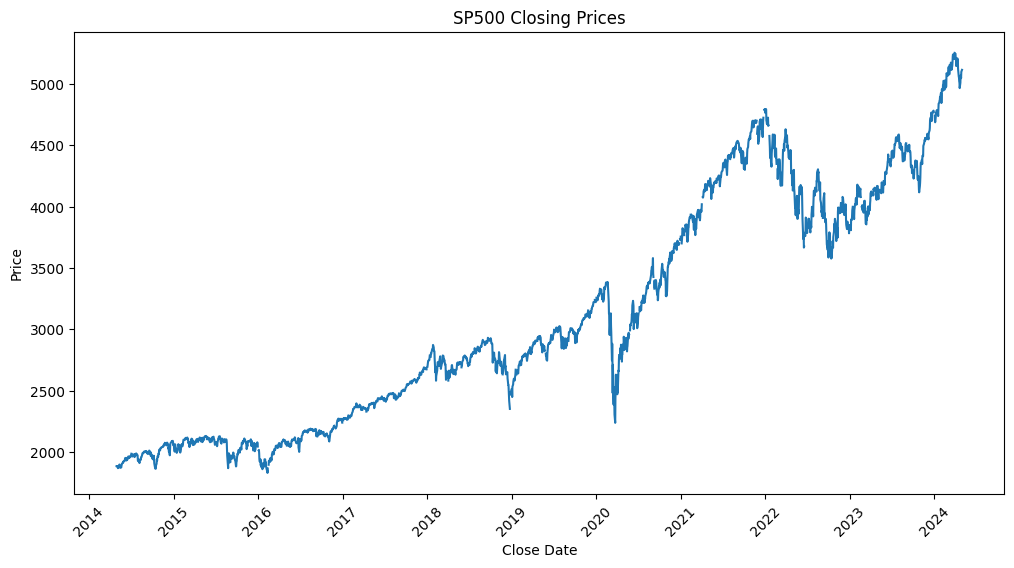

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df_sp500.index, df_sp500["close"])

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('Close Date')
plt.xticks(rotation=45)

# Set the y-axis label
ax.set_ylabel('Price')

# Set the plot title
plt.title('SP500 Closing Prices')

Text(0.5, 1.0, 'SP500 Daily Returns (%)')

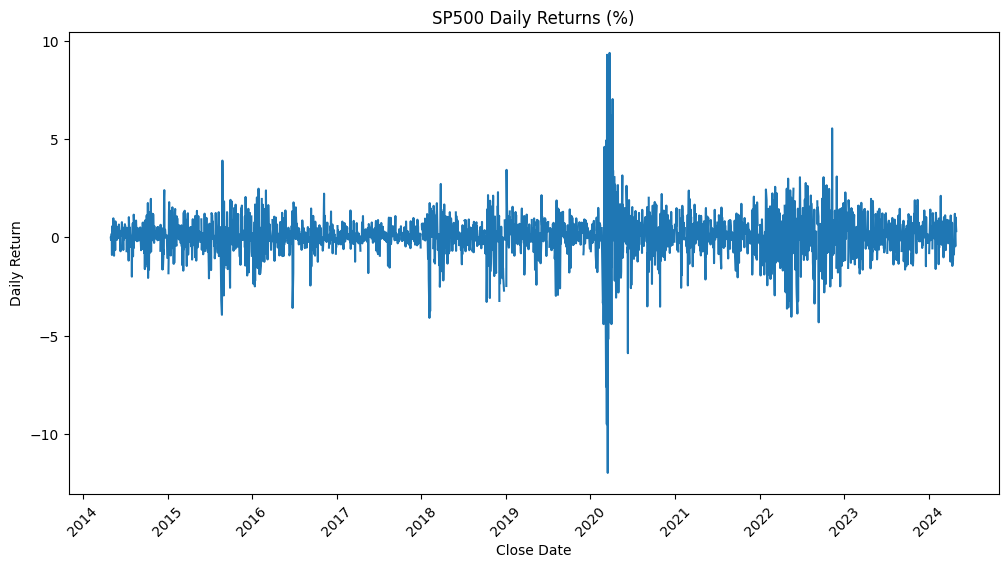

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df_sp500.index, df_sp500["daily_return"] * 100)

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('Close Date')
plt.xticks(rotation=45)

# Set the y-axis label
ax.set_ylabel('Daily Return')

# Set the plot title
plt.title('SP500 Daily Returns (%)')